---

---

# 01. Introduction

---

## 🟧 Halo(Galaxy)Maker (HM)

The main algorithm is AdaptaHOP (Aubert et al. 2004), which is largely classified as a **density-based detection method**. Following the basic principles of Morse theory (Josh 2002), this method first defines density peak patches (i.e., ensembles of field lines converging to the same local maximum), which are identified as the smallest substructures. The connectivity between substructures is determined by the saddle points, which are local maxima on the surfaces that define the contours of the peak patches. After preparing these patches, the hierarchy is constructed using the "Most Massive Submaxima Method" (MSM; Tweed et al. 209). Starting with the most massive substructures, the algorithm recursively finds lower-level structures that cover the same spatial regions and includes them as part of the main halo. After this stage, remaining substructures located within other main structures become subhalos.
Below key parameter setting is used for our galaxy(halo) catalog

<img src="./images/HaloMaker_ex2.jpg" width="40%" height="40%">
<img src="./images/HaloMaker_ex.png" width="30%" height="30%">

---

## 🟦 VELOCIraptor (VR)

VELOCIraptor-STF is based on a **friends-of-friends clustering algorithm**. The key characteristic of this code is its use of a **6-dimensional metric between particles**, as opposed to the traditional 3D metric. The benefits of using a higher-dimensional metric are especially significant when identifying objects in dense regions, such as galaxy clusters, where distances between objects are small and interactions like mergers and fly-by frequently occur. In such cases, methods based on the traditional 3D metric often fail to distinguish between two closely located objects. However, in 6D phase-space, even if two objects are spatially connected, they usually have different velocity components, resulting in two isolated peaks in the phase-space. This allows for a more sophisticated definition of substructures in high-density regions.

<img src="./images/VR_ex.jpg" width="70%" height="70%">
<img src="./images/VR_ex2.png" width="70%" height="70%">

ㅤ  
ㅤ  
ㅤ  
ㅤ  
ㅤ  
ㅤ  
ㅤ  
ㅤ  

---

---

# 02. Download Catalogues

---

1. `https://gemsimulation.com/` - [Data Access] - [Data] - [Download Catalog]

2. **Refresh using [F5]**

3. Choose input options and click [submit]  
   ex)  
    > <img src="./images/ss01.png" width="50%" height="50%">  
    >
    > <img src="./images/ss02.png" width="50%" height="50%">  

4. Wait.. (You can see the progress by [F12] in browsers)  
    > <img src="./images/ss03.png" width="50%" height="50%">  

5. Download zip file (`yyyymmdd_xxxxxx.zip`)  
    > <img src="./images/ss04.png" width="50%" height="50%">  

---

## ❓QUIZ 01❓
 > **1. Download a galaxy catalog of 411th snapshot of NewCluster (GalaxyMaker, pickle format)**  
 > **2. What is the size of downloaded zip file?**  

<details><summary>Answer</summary>

5.6M

</details>

---

## 🟧 HaloMaker

In [1]:
# --------------------------------------------------------
# Load libraries
# --------------------------------------------------------
import numpy as np
import zipfile, os
from tqdm import tqdm

# --------------------------------------------------------
# Unzip the file
# --------------------------------------------------------
'''
For HaloMaker
    galaxy:   (GalaxyMaker_xxxxx.pkl, info_xxxxx.txt)
    halo:     (HaloMaker_xxxxx.pkl, info_xxxxx.txt)
'''
zname_HM = "./gm_example.zip" # <- Change this to the name of the zip file you want to extract
with zipfile.ZipFile(zname_HM, 'r') as zip_ref:
    zip_ref.extractall()


# --------------------------------------------------------
# ascii to numpy
# --------------------------------------------------------
# gname = "GalaxyMaker_00411.csv" # <- Change this to the name of the galaxy file you want to read
# with open(gname, 'r') as f:
#     header = f.readline()[2:-1]
#     header = header.split(',')
#     names = [h[:h.index("[")] for h in header]
#     units = [h[h.index("["):] for h in header]
# HMs = np.genfromtxt(gname, delimiter=',', names=names, case_sensitive=True, dtype=None)

# --------------------------------------------------------
# pickle to numpy
# --------------------------------------------------------
if(np.__version__ >= '1.16.3'):
    HMs = np.load("GalaxyMaker_00411.pkl", allow_pickle=True)
else:
    import pickle as pkl
    with open("GalaxyMaker_00411.pkl", 'rb') as f:
        HMs = pkl.load(f)

# --------------------------------------------------------
# Read the parameter file
# --------------------------------------------------------
pname = "info_00411.txt" # <- Change this to the name of the parameter file you want to read
with open(pname, "r") as f:
    HMparams = {key:float(val) if('.' in val) else int(val) for key, val in [line.split(':') for line in f]}

---

## ❓QUIZ 02❓
 > **How many galaxies in 411th NewCluster snapshots?**  

<details><summary>Hint</summary>

Use `len` or `arr.shape`

</details>

<details><summary>Answer</summary>

7411

</details>

---

4.952 $\times$ $10^{11}$ $M_\odot$

## 🟦 VELOCIraptor

**In this session, we do not cover VR data, but you can follow below code or use VELUGA library (https://veluga.readthedocs.io/en/latest/index.html)**

<details><summary>Example</summary>

```python
# --------------------------------------------------------
# Load libraries
# --------------------------------------------------------
import numpy as np
import zipfile, os
import h5py

# --------------------------------------------------------
# Unzip the file
# --------------------------------------------------------
'''
For VELOCIraptor
    galaxy:   snap_xxxx.hdf5
    halo:     snap_xxxx.hdf5)
'''
zname_VR = "./20240813_703121.zip" # <- Change this to the name of the zip file you want to extract
with zipfile.ZipFile(zname_VR, 'r') as zip_ref:
    zip_ref.extractall()
flist = os.listdir()


# --------------------------------------------------------
# HDF5 to numpy
# --------------------------------------------------------
fname = "snap_0211.hdf5" # <- Change this to the name of the galaxy file you want to read
VRparams = {}
with h5py.File(fname, 'r') as f:
    # --- CRITERIA ----------------------------
    # Contamination within each `contam_r` radius
    contam_r = f['CONF_R'][:]; VRparams['CONF_R'] = contam_r
    # SFR criteria
    sfr_r = f['SFR_R'][:]; VRparams['SFR_R'] = sfr_r
    sfr_T = f['SFR_T'][:]; VRparams['SFR_T'] = sfr_T
    # Magnitude within each `mag_r` radius
    mag_r = f['MAG_R'][:]; VRparams['MAG_R'] = mag_r
    flux_list = f['Flux_List'][:].astype(str); VRparams['Flux_List'] = flux_list

    # --- GALAXY ----------------------------
    ids = f['ID'][:]
    VRs = None; dtype = [('ID',int)]; tmp = [ids[0]]
    for iid in tqdm(ids):
        igal = f[f'ID_{iid:06d}']
        aexp = igal['Aexp'][0]
        domain_list = np.where(igal['Domain_List'][:]>0)[0]

        gkeys = igal['G_Prop'].keys()
        for gkey in gkeys:
            data = igal['G_Prop'][gkey][:]

            if(len(data) == 1):
                if(VRs is None):
                    dtype.append( (gkey, type(data[0])) )
                    tmp.append(data[0])
                else:
                    VRs[iid-1][gkey] = data[0]
            elif(len(data) == len(mag_r)):
                if('mag' in gkey)or('SB' in gkey): prefix='R'
                elif('Con' in gkey): prefix='C'
                else: raise ValueError(f"Unknown data format for {gkey}")
                
                for ith in range(len(mag_r)):
                    key = f"{gkey}_{prefix}{ith+1}"
                    if(VRs is None):
                        dtype.append( (key, type(data[ith])) )
                        tmp.append(data[ith])
                    else:
                        VRs[iid-1][key] = data[ith]
            elif(len(data) == len(sfr_r)):
                if('SFR' in gkey): prefix='S'
                else: raise ValueError(f"Unknown data format for {gkey}")

                for ith in range(len(sfr_r)):
                    key = f"{gkey}_{prefix}{ith+1}"
                    if(VRs is None):
                        dtype.append( (key, type(data[ith])) )
                        tmp.append(data[ith])
                    else:
                        VRs[iid-1][key] = data[ith]
            else:
                raise ValueError(f"Unknown data format for {gkey}")
            
        if(VRs is None):
            VRs = np.empty(len(ids), dtype=dtype)
            for key,val in zip(dtype,tmp):
                VRs[0][key[0]] = val
        else:
            VRs[iid-1]['ID'] = iid
    VRparams['Aexp'] = aexp

    # --- EXTENDED ----------------------------
    odtype = VRs.dtype
    ndtype = odtype.descr + [('Mass_tot', 'f8'), ('Mvir', 'f8'), ('R_HalfMass', 'f8'), ('Rvir', 'f8')]
    nVRs = np.empty(len(ids), dtype=ndtype)
    for key in odtype.names: nVRs[key] = VRs[key]
    VRs = nVRs
    VRs['Mass_tot'] = f['Mass_tot'][:]
    VRs['Mvir'] = f['Mvir'][:]
    VRs['R_HalfMass'] = f['R_HalfMass'][:]
    VRs['Rvir'] = f['Rvir'][:]
```

</details>

ㅤ  
ㅤ  
ㅤ  
ㅤ  
ㅤ  
ㅤ  
ㅤ  
ㅤ  

---

---

# 03. Data handling

---

## 🟧 HaloMaker

In [2]:
print("GalaxyMaker")
print(f" --- {len(HMs)} galaxies loaded ---\n")

txt = HMs.dtype.names
print("Available keys:\n" + '\t'.join(txt) + "\n")

print(f"Parameters:\n{HMparams}\n")

GalaxyMaker
 --- 7411 galaxies loaded ---

Available keys:
Nparts	ID	Timestep	level	MainHost	SubHost	aexp	Mass	X	Y	Z	Vx	Vy	Vz	Lx	Ly	Lz	Rmax	Ek	Ep	Et	Spin	Sigma	SigmaBulge	Mbulge	r50	r90	r50u	r90u	r50g	r90g	r50r	r90r	r50i	r90i	r50z	r90z	SFR	SFR_r50	SFR_r90	SFR10	SFR10_r50	SFR10_r90	umag	gmag	rmag	imag	zmag	age	ageu	ageg	ager	agei	agez	metal	vsig	vsig_r50	vsig_r90	SBu	SBu_r50	SBu_r90	SBg	SBg_r50	SBg_r90	SBr	SBr_r50	SBr_r90	SBi	SBi_r50	SBi_r90	SBz	SBz_r50	SBz_r90	MBH	dBH	vsig_gas	vsig_gas_r50	vsig_gas_r90	metal_gas	M_gas	M_gas_r50	M_gas_r90	Mcold_gas	Mcold_gas_r50	Mcold_gas_r90	Mdense_gas	Mdense_gas_r50	Mdense_gas_r90	H_gas	O_gas	Fe_gas	Mg_gas	C_gas	N_gas	Si_gas	S_gas	D_gas	CDustSmall_gas	CDustLarge_gas	SiDustSmall_gas	SiDustLarge_gas

Parameters:
{'ncpu': 960, 'ndim': 3, 'levelmin': 8, 'levelmax': 21, 'ngridmax': 4000000, 'nstep_coarse': 38262, 'boxlen': 1.0, 'time': -1.34385025856362, 'aexp': 0.460158685234279, 'H0': 70.3000030517578, 'omega_m': 0.272000014781952, 'omega_l': 0.727999985

---

## ❓QUIZ 03❓
 > **Find a star formation rate of the most massive galaxy**  

<details><summary>Hint</summary>

Use `np.argmax`

</details>

<details><summary>Answer</summary>

0.195 $M_\odot$ $yr^{-1}$

</details>

---

## 🟦 VR

<details><summary>VR Example</summary>

```python
print("VELOCIraptor")
print(f" --- {len(VRs)} galaxies loaded ---\n")
print(f"Available keys:\n {'\t'.join(VRs.dtype.names)}\n")
print(f"Parameters:\n{VRparams}\n")
```


```plain
VELOCIraptor
 --- 9363 galaxies loaded ---

Available keys:
 ID	G_ABmag_NUV_R1	G_ABmag_NUV_R2	G_ABmag_NUV_R3	G_ABmag_g_R1	G_ABmag_g_R2	G_ABmag_g_R3	G_ABmag_i_R1	G_ABmag_i_R2	G_ABmag_i_R3	G_ABmag_r_R1	G_ABmag_r_R2	G_ABmag_r_R3	G_ABmag_u_R1	G_ABmag_u_R2	G_ABmag_u_R3	G_ABmag_z_R1	G_ABmag_z_R2	G_ABmag_z_R3	G_ConFrac_M_C1	G_ConFrac_M_C2	G_ConFrac_M_C3	G_ConFrac_N_C1	G_ConFrac_N_C2	G_ConFrac_N_C3	G_Efrac	G_ID	G_ID_mbp	G_Lx	G_Ly	G_Lz	G_Mass_200crit	G_Mass_200mean	G_Mass_FOF	G_Mass_tot	G_Mvir	G_R_200crit	G_R_200mean	G_R_HalfMass	G_R_HalfMass_200crit	G_R_HalfMass_200mean	G_R_size	G_Rmax	G_Rvir	G_SB_NUV_R1	G_SB_NUV_R2	G_SB_NUV_R3	G_SB_g_R1	G_SB_g_R2	G_SB_g_R3	G_SB_i_R1	G_SB_i_R2	G_SB_i_R3	G_SB_r_R1	G_SB_r_R2	G_SB_r_R3	G_SB_u_R1	G_SB_u_R2	G_SB_u_R3	G_SB_z_R1	G_SB_z_R2	G_SB_z_R3	G_SFR_S1	G_SFR_S2	G_SFR_S3	G_SFR_S4	G_SFR_S5	G_SFR_S6	G_SFR_S7	G_SFR_S8	G_SFR_S9	G_SFR_S10	G_SFR_S11	G_SFR_S12	G_SFR_S13	G_SFR_S14	G_SFR_S15	G_Structuretype	G_VXc	G_VYc	G_VZc	G_Vmax	G_Xc	G_Yc	G_Zc	G_hostHaloID	G_npart	G_numSubStruct	G_sigV	Mass_tot	Mvir	R_HalfMass	Rvir

Parameters:
{'CONF_R': array([ 1.,  5., 10.], dtype=float32), 'SFR_R': array([-1. ,  0.1,  1. , -1. ,  0.1,  1. , -1. ,  0.1,  1. , -1. ,  0.1,
        1. , -1. ,  0.1,  1. ], dtype=float32), 'SFR_T': array([0.01, 0.01, 0.01, 0.05, 0.05, 0.05, 0.1 , 0.1 , 0.1 , 0.5 , 0.5 ,
       0.5 , 1.  , 1.  , 1.  ], dtype=float32), 'MAG_R': array([-1. ,  0.1,  1. ], dtype=float32), 'Flux_List': array(['NUV', 'u', 'g', 'r', 'i', 'z'], dtype='<U4'), 'Aexp': np.float64(0.31727220163947)}
```

</details>

---

## Example

In [3]:
import matplotlib.pyplot as plt

### ex1) Spatial distribution

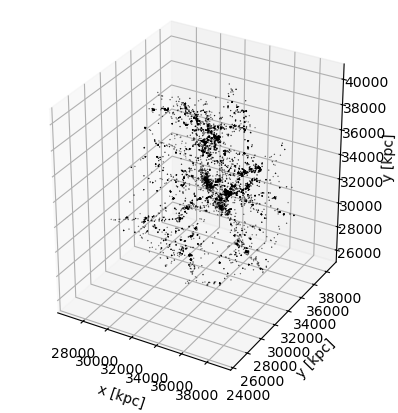

In [4]:
fig, ax = plt.subplots(dpi=100, subplot_kw=dict(projection='3d'))


ax.scatter(HMs['X'], HMs['Y'], HMs['Z'], s=1, ec='none', fc='k')


ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.set_zlabel('y [kpc]')
ax.set_aspect('equal')

plt.show(); plt.close()

### ex2) Draw mass functions

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


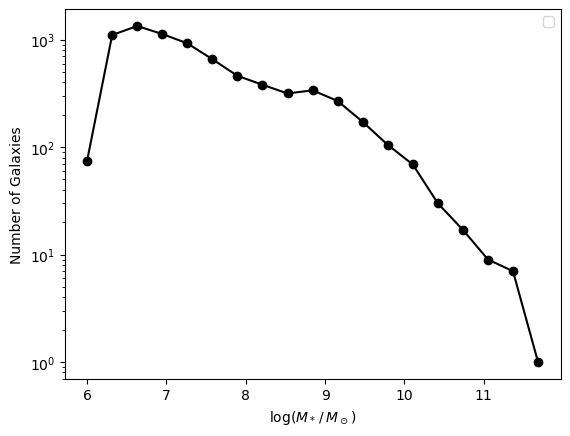

In [5]:
fig, ax = plt.subplots(dpi=100, )


bins = np.linspace(6, 12, 20)
logm = np.log10(HMs['Mass'])
hist, edge = np.histogram(logm, bins=bins)
ax.plot(edge[:-1], hist, marker='o', color='k')


ax.set_yscale('log')
ax.set_ylabel('Number of Galaxies')
ax.set_xlabel(r'$\log(M_*\,/\,M_\odot)$')
ax.legend()

plt.show(); plt.close()

### ex3) Mass

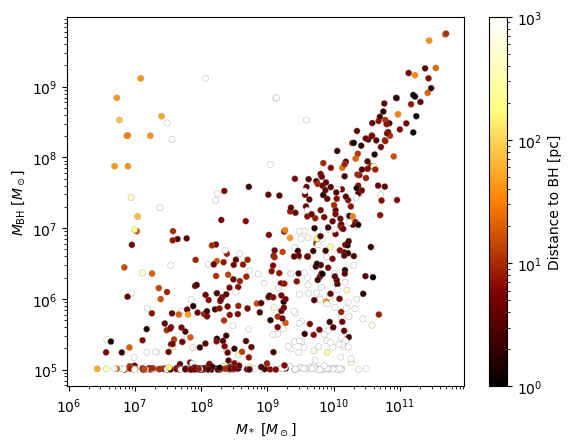

In [6]:
fig, ax = plt.subplots(dpi=100, )


sc = ax.scatter(
    HMs['Mass'], HMs['MBH'], 
    s=20, ec='grey', lw=0.2, 
    c=HMs['dBH']*1000, cmap='afmhot',
    norm=plt.cm.colors.LogNorm(vmax=1e3, vmin=1e0),
    )
fig.colorbar(sc, label='Distance to BH [pc]')


ax.set_yscale('log')
ax.set_ylabel(r'$M_{\rm BH}$ [$M_\odot$]')
ax.set_xscale('log')
ax.set_xlabel(r'$M_*$ [$M_\odot$]')

plt.show(); plt.close()

---

## ❓QUIZ 04❓
 > **Draw CMD (Colour-Magnitude Diagram)**  
 > x-axis: r-band magnitude  
 > y-axis: g-r colour

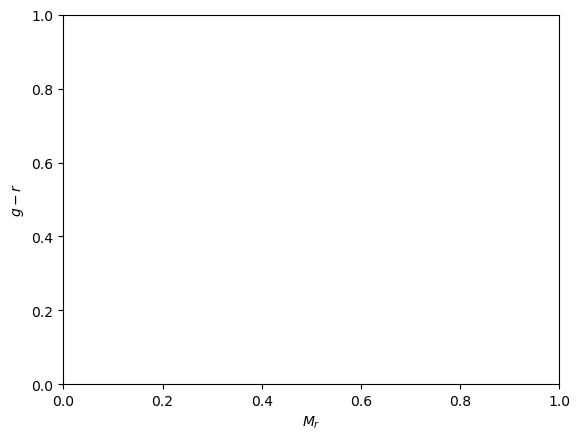

In [7]:
fig, ax = plt.subplots(dpi=100)


# -------------------------
# HERE!



# -------------------------


ax.set_xlabel('$M_r$')
ax.set_ylabel('$g-r$')

plt.show(); plt.close()

<details><summary>Answer</summary>

<img src="./images/CMD.png" width="50%" height="50%">

</details>

---

## ❓QUIZ 05❓
 > **Draw $\rm{SFR}$ - $M_*$**  
 > x-axis: Stellar Mass  
 > y-axis: SFR measured in R50  
 > Excluded substructures (level>1)

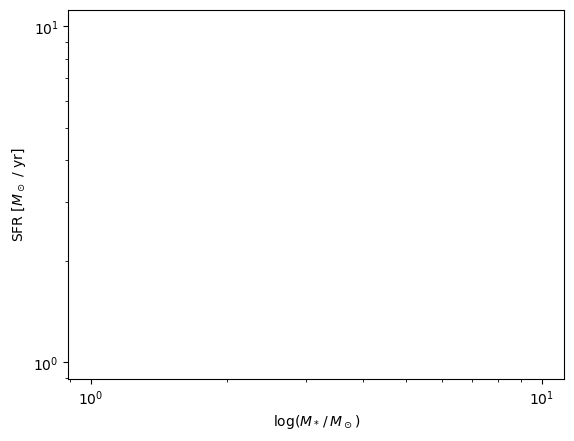

In [8]:
fig, ax = plt.subplots(dpi=100, )


main = HMs[HMs['level']==1]
# -------------------------
# HERE!



# -------------------------


ax.set_yscale('log')
ax.set_ylabel(r'SFR [$M_\odot$ / yr]')
ax.set_xscale('log')
ax.set_xlabel(r'$\log(M_*\,/\,M_\odot)$')

plt.show(); plt.close()

<details><summary>Answer</summary>

<img src="./images/SFMS.png" width="50%" height="50%">

</details>

---

## ❓QUIZ 06❓
 > **Draw Size-Mass Relation**  
 > x-axis: Stellar Mass  
 > y-axis: R50 (r-band luminosity weighted)  
 > Separate main (level=1) and substructures (level>1)  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


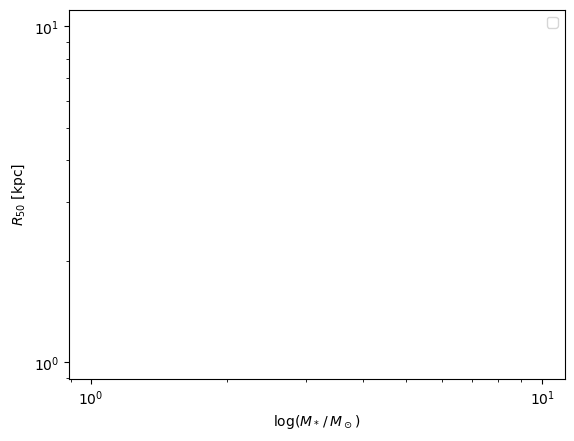

In [9]:
fig, ax = plt.subplots(dpi=100, )


main = HMs[HMs['level']==1]
subs = HMs[HMs['level']>1]
# -------------------------
# HERE!



# -------------------------

ax.set_yscale('log')
ax.set_ylabel(r'$R_{\rm 50}$ [kpc]')
ax.set_xscale('log')
ax.set_xlabel(r'$\log(M_*\,/\,M_\odot)$')
ax.legend()

plt.show(); plt.close()

<details><summary>Answer</summary>

<img src="./images/sizemass.png" width="50%" height="50%">

</details>

ㅤ  
ㅤ  
ㅤ  
ㅤ  
ㅤ  
ㅤ  
ㅤ  
ㅤ  

---

---

# 04. Merger Tree

---

## I. Download Main Branch

1. `https://gemsimulation.com/` - [Data Access] - [Data] - [Download Branch]

2. **Refresh using [F5]**

3. Same as catalog

<details><summary>Tree Detailed</summary>

Advanced merger tree to connect HaloMaker catalogue.  

**Startegy**  
Calculate mutual shared fraction of particles in multiple snapshots  

**Key columns**  
`id`: Unique ID through all snapshots (NOT identical to HaloMaker)  
`hmid`: ID in Halo/GalaxyMaker  
`fat`: `id` of most probable progenitor  
`score_fat`: (Nshared/Nparts_fat) * (Nshared/Nparts_this)  
`son`: `id` of most probable descendant  
`score_son`: (Nshared/Nparts_son) * (Nshared/Nparts_this)  
`desc`: [ shape(3,4) ]: (i,j) = At ith next snap, jth most probable descendant  
`npass`: Of `nparts` member particles, how many particles are in `desc`  
`first`: First leaf `id` of the branch  
`last`: Last leaf `id` of the branch  



**Query processing**
1. Input values: IDs, Timestep
2. Return same `last` galaxies

</details>

---

## ❓QUIZ 07❓
 > **1. Download a main branch of the most massive galaxy at 411th snapshot**  
 > **2. What is the size of downloaded zip file?**  

<details><summary>Answer</summary>

393K

</details>

---

## II. Read zip in python

In [10]:
# --------------------------------------------------------
# Load libraries
# --------------------------------------------------------
import numpy as np
import zipfile, os
import pickle

# --------------------------------------------------------
# Unzip the file
# --------------------------------------------------------
'''
For HaloMaker
    (ytree_{Simulation}_{Snapshot}_{ID}.pkl) or (ptree_{Simulation}_{Snapshot}_{ID}.pkl)
'''
# Example:
# Target is ID=11 in 411th snapshot NC
zname = "./tree_example.zip" # <- Change this to the name of the zip file you want to extract
with zipfile.ZipFile(zname, 'r') as zip_ref:
    zip_ref.extractall()

# --------------------------------------------------------
# pickle to numpy
# --------------------------------------------------------
tname = "ytree_NewCluster_411_11.pkl" # <- Change this to the name of the galaxy file you want to read
if(np.__version__ >= '1.16.3'):
    tree = np.load(tname, allow_pickle=True)
else:
    with open(tname, 'rb') as f:
        tree = pickle.load(f)
print(f"Tree length: {len(tree)}")
print(f" > Available:\n{tree.dtype.names}")

Tree length: 365
 > Available:
('nparts', 'id', 'timestep', 'host', 'aexp', 'm', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'r', 'rvir', 'mvir', 'prog', 'prog_score', 'desc', 'desc_score', 'fat', 'son', 'fat_score', 'son_score', 'first', 'from', 'last', 'final', 'umag', 'gmag', 'rmag', 'imag', 'zmag', 'r50', 'r50g', 'r50i', 'r50r', 'r50u', 'r50z', 'r90', 'r90g', 'r90i', 'r90r', 'r90u', 'r90z', 'age', 'ageg', 'agei', 'ager', 'ageu', 'agez', 'SFR', 'SFR_r50', 'SFR_r90', 'SFR10', 'SFR10_r50', 'SFR10_r90', 'vsig', 'vsig_r50', 'vsig_r90', 'SBu', 'SBu_r50', 'SBu_r90', 'SBg', 'SBg_r50', 'SBg_r90', 'SBr', 'SBr_r50', 'SBr_r90', 'SBi', 'SBi_r50', 'SBi_r90', 'SBz', 'SBz_r50', 'SBz_r90', 'metal', 'MBH', 'dBH', 'M_gas', 'M_gas_r50', 'M_gas_r90', 'Mcold_gas', 'Mcold_gas_r50', 'Mcold_gas_r90', 'Mdense_gas', 'Mdense_gas_r50', 'Mdense_gas_r90', 'vsig_gas', 'vsig_gas_r50', 'vsig_gas_r90', 'metal_gas', 'H_gas', 'O_gas', 'Fe_gas', 'Mg_gas', 'C_gas', 'N_gas', 'Si_gas', 'S_gas', 'D_gas', 'CDustLarge_gas', 'CDustSmall

## III. Examples

### ex1) Mass Evolution

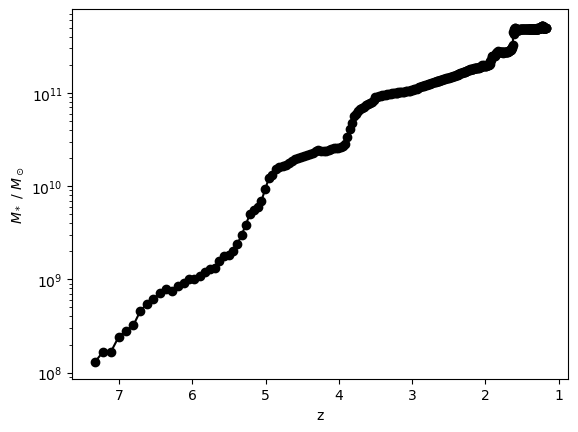

In [11]:
fig, ax = plt.subplots(dpi=100, )


ax.plot(1/tree['aexp']-1, tree['m'], marker='o', color='k')


ax.set_yscale('log')
ax.set_ylabel(r'$M_*$ / $M_\odot$')
ax.set_xlabel(r'z')
ax.invert_xaxis()

plt.show(); plt.close()

### ex2) Motion in Comoving Box

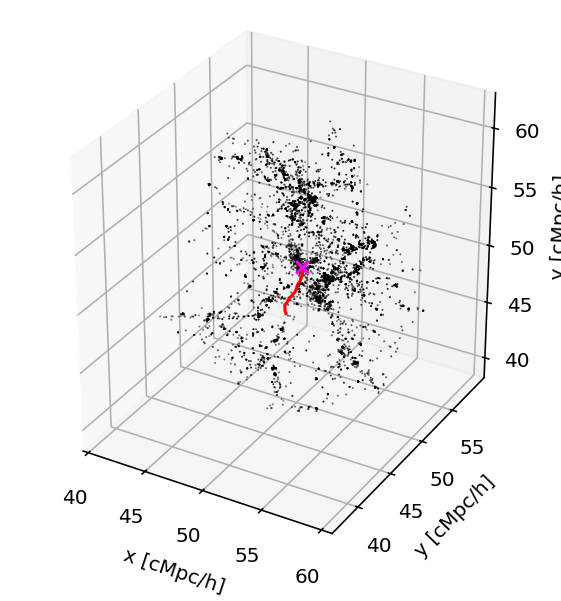

In [12]:
fig, ax = plt.subplots(dpi=144, subplot_kw=dict(projection='3d',computed_zorder=False))


# Galaxy distribution at 411th (Physical to Comoving)
cXs = HMs['X'] / HMs['aexp'] * HMparams['h'] / 1000 # [cMpc/h]
cYs = HMs['Y'] / HMs['aexp'] * HMparams['h'] / 1000 # [cMpc/h]
cZs = HMs['Z'] / HMs['aexp'] * HMparams['h'] / 1000 # [cMpc/h]
ax.scatter(cXs, cYs, cZs, s=1, ec='none', fc='k', zorder=0)

# Target's track (Physical to Comoving)
xs = tree['x'] / tree['aexp'] * HMparams['h'] / 1000 # [cMpc/h]
ys = tree['y'] / tree['aexp'] * HMparams['h'] / 1000 # [cMpc/h]
zs = tree['z'] / tree['aexp'] * HMparams['h'] / 1000 # [cMpc/h]
ax.plot(xs, ys, zs, c='r', zorder=1)
ax.scatter(xs[-1], ys[-1], zs[-1], s=40, fc='magenta', marker='x', zorder=3)

ax.set_xlabel('x [cMpc/h]')
ax.set_ylabel('y [cMpc/h]')
ax.set_zlabel('y [cMpc/h]')
ax.set_aspect('equal')

plt.show(); plt.close()

### ex3) MBH-Sigma Evolution

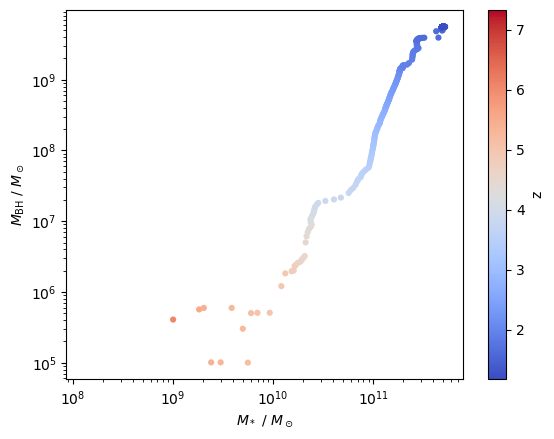

In [13]:
fig, ax = plt.subplots(dpi=100, )


sc = ax.scatter(tree['m'], tree['MBH'], c=1/tree['aexp']-1, cmap='coolwarm', s=20, ec='none')
colorbar = fig.colorbar(sc, label='z')


ax.set_yscale('log')
ax.set_ylabel(r'$M_{\rm BH}$ / $M_\odot$')
ax.set_xscale('log')
ax.set_xlabel(r'$M_*$ / $M_\odot$')

plt.show(); plt.close()

---

## ❓QUIZ 08❓
 > **1. Draw sSFR(=SFR/$M_*$) = $10^{-10}$ [$yr^{-11}$] line in the SFR-$M_*$ plane**  
 > **2. Overplot the evolutionary track of above branch**  
 > x-axis: $M_*$  
 > y-axis: Star formation rate (Timewindow: 10Myr) (Within R50)  
 > Colors: Redshift
 > Also draw  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


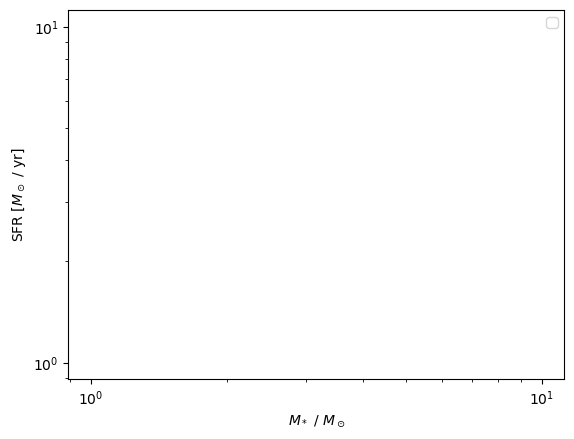

In [14]:
fig, ax = plt.subplots(dpi=100, )


# -------------------------
# HERE!



# -------------------------


ax.set_yscale('log')
ax.set_ylabel(r'SFR [$M_\odot$ / yr]')
ax.set_xscale('log')
ax.set_xlabel(r'$M_*$ / $M_\odot$')
ax.legend()

plt.show(); plt.close()

<details><summary>Answer</summary>

```python
# sSFR = SFR / M*
xs = np.linspace(1e8, 1e12, 10)
ys = xs / 1e10
ax.plot(xs, ys, color='k', zorder=-1, ls='--', lw=2, label=r'sSFR = $10^{-10}$ [yr$^{-1}$]')

# Target's track
ax.plot(tree['m'], tree['SFR10_r50'], color='grey', zorder=-1, lw=0.5)
sc = ax.scatter(tree['m'], tree['SFR10_r50'], c=1/tree['aexp']-1, cmap='coolwarm', s=20, ec='grey', lw=0.5)
colorbar = fig.colorbar(sc, label='z')

```
<img src="./images/track_SFMS.png" width="50%" height="50%">

</details>

---

ㅤ  
ㅤ  
ㅤ  
ㅤ  
ㅤ  
ㅤ  
ㅤ  
ㅤ  

---

---

# 05. Further example

## I. Download raw data and read

In [15]:
# Find the position of the target galaxy
target = HMs[41-1] # ID=41

#---------------------------------------------
# ! Warning !
#
# Our query uses (1 kpc = 3.08e21 cm)
#---------------------------------------------
xc = target['X']
yc = target['Y']
zc = target['Z']

print(xc,yc,zc,"  <- Copy this!")

28938.702148281885 30704.86918825617 30018.563946074595   <- Copy this!


1. `https://gemsimulation.com/` - [Data Access] - [Data] - [Download Raw Data]

2. **Refresh using [F5]**

3. X, Y, Z, Radius are kpc(physical) unit

---

### Particle

In [16]:
# --------------------------------------------------------
# Load libraries
# --------------------------------------------------------
import numpy as np
import zipfile, os
import pickle


# --------------------------------------------------------
# Unzip the file
# --------------------------------------------------------
zname = "./part_example.zip" # <- Change this to the name of the zip file you want to extract
with zipfile.ZipFile(zname, 'r') as zip_ref:
    pfiles = zip_ref.namelist()
    for pfile in pfiles:
        if(os.path.exists(pfile)):
            continue
        zip_ref.extract(pfile)

# --------------------------------------------------------
# pickle to numpy
# --------------------------------------------------------
pname = pfiles[0]
print(pname)
with open(pname, 'rb') as f:
    part, pparams = pickle.load(f)
print(f"Nparts: {len(part)}")
print(f" > Available:\n{part.dtype.names}")

20240823_958273.pkl
Nparts: 3458339
 > Available:
('xx', 'yy', 'zz', 'vx', 'vy', 'vz', 'mp', 'ap', 'zp', 'gyr', 'sfact', 'redsh', 'family', 'domain', 'id', 'KE', 'UE', 'PE')


**family?**  
`family` represents the type of particle.  
-  1: DM
-  2: Star
-  3: Cloud (of SMBH)
-  0: Gas tracer (following gas motion)
- -2: Star tracer (gas --(SF)--> star)
- -3: Cloud tracer (accreted to SMBH)

In [17]:
family, counts = np.unique(part['family'], return_counts=True)
for f, c in zip(family, counts):
    print(f"Family {f}: {c}")

Family -3: 45860
Family -2: 88919
Family 0: 26568
Family 1: 89850
Family 2: 3205033
Family 3: 2109


---

### Cell

In [24]:
# --------------------------------------------------------
# Load libraries
# --------------------------------------------------------
import numpy as np
import zipfile, os
import pickle


# --------------------------------------------------------
# Unzip the file
# --------------------------------------------------------
zname = "./cell_example.zip" # <- Change this to the name of the zip file you want to extract
with zipfile.ZipFile(zname, 'r') as zip_ref:
    cfiles = zip_ref.namelist()
    for cfile in cfiles:
        if(os.path.exists(cfile)):
            continue
        zip_ref.extract(cfile)

# --------------------------------------------------------
# pickle to numpy
# --------------------------------------------------------
cname = cfiles[0]
print(cname)
with open(cname, 'rb') as f:
    cell, cparams = pickle.load(f)
print(f"Ncells: {len(cell)}")
print(f" > Available:\n{cell.dtype.names}")

20240823_101176.pkl
Ncells: 630180
 > Available:
('xx', 'yy', 'zz', 'vx', 'vy', 'vz', 'level', 'dx', 'den', 'temp', 'zp', 'mp', 'KE', 'UE', 'PE', 'chem_H', 'chem_O', 'chem_Fe', 'chem_Mg', 'chem_C', 'chem_N', 'chem_Si', 'chem_S', 'chem_D', 'dust_1', 'dust_2', 'dust_3', 'dust_4', 'refine', 'skip2')


**level?**  
`level` represents the AMR grid level. Higher level means finer (smaller) grid.  
ex)  
Box length is 1 in code unit. (=100 cMpc/h)  
level=10 means 10 times refinement, so the cell size is $1 / 2^{10}$ in code unit. (=97.65625 ckpc/h)   

In [19]:
level, counts = np.unique(cell['level'], return_counts=True)
for l, c in zip(level, counts):
    icell = cell[cell['level']==l][0]
    print(f"lvl. {l}: {c} (dx = {icell['dx']*1000:.2f} pc)")

lvl. 16: 2059 (dx = 998.79 pc)
lvl. 17: 47000 (dx = 499.39 pc)
lvl. 18: 95662 (dx = 249.70 pc)
lvl. 19: 213003 (dx = 124.85 pc)
lvl. 20: 272456 (dx = 62.42 pc)


## II. Draw particle image 

Mass-weighted density map 

/tmp/ipykernel_1945929/4222748592.py:18: RuntimeWarning: divide by zero encountered in log10
  column_density = np.log10(mass.T / dA)
/tmp/ipykernel_1945929/4222748592.py:27: RuntimeWarning: divide by zero encountered in log10
  column_density = np.log10(mass.T / dA)
/tmp/ipykernel_1945929/4222748592.py:35: RuntimeWarning: divide by zero encountered in log10
  column_density = np.log10(mass.T / dA)
/tmp/ipykernel_1945929/4222748592.py:44: RuntimeWarning: divide by zero encountered in log10
  column_density = np.log10(mass.T / dA)


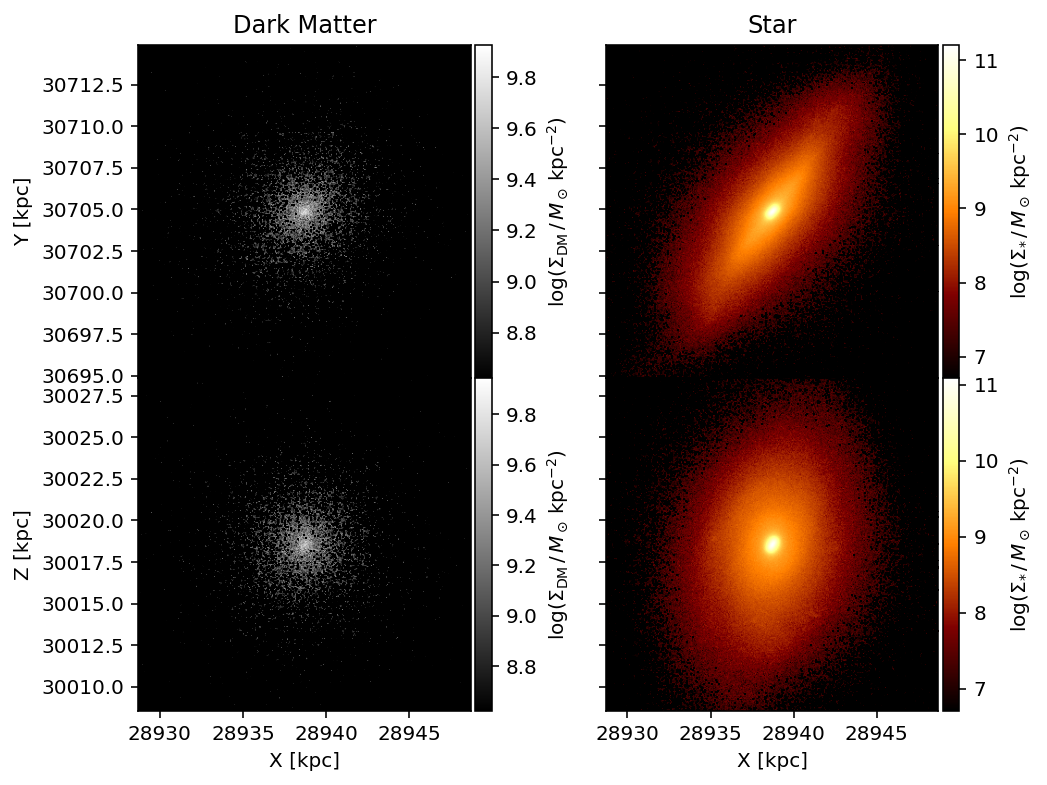

In [20]:
fig, axes = plt.subplots(figsize=(8,6), ncols=2, nrows=2, dpi=144, sharex=True, sharey='row')
# axes:
# [0,0], [0,1]
# [1,0], [1,1]

shape = 360
xbins = np.linspace(xc-10, xc+10, shape+1)
ybins = np.linspace(yc-10, yc+10, shape+1)
zbins = np.linspace(zc-10, zc+10, shape+1)
dA = (xbins[1]-xbins[0]) * (ybins[1]-ybins[0]) # [kpc^2]
dm = part[part['family']==1]
star = part[part['family']==2]


# Dark Matter (X-Y)
ax = axes[0,0]; ax.set_facecolor('black')
mass, xe, ye = np.histogram2d(dm['xx'], dm['yy'], bins=[xbins, ybins], weights=dm['mp'])
column_density = np.log10(mass.T / dA)
im = ax.imshow(column_density, extent=[xe[0], xe[-1], ye[0], ye[-1]], origin='lower', cmap='gray')
fig.colorbar(im, ax=ax, label=r'$\log(\Sigma_{\rm DM}\,/\,M_\odot\,{\rm kpc}^{-2})$', pad=0.01)
ax.set_title('Dark Matter')
ax.set_ylabel('Y [kpc]')

# Star (X-Y)
ax = axes[0,1]; ax.set_facecolor('black')
mass, xe, ye = np.histogram2d(star['xx'], star['yy'], bins=[xbins, ybins], weights=star['mp'])
column_density = np.log10(mass.T / dA)
im = ax.imshow(column_density, extent=[xe[0], xe[-1], ye[0], ye[-1]], origin='lower', cmap='afmhot')
fig.colorbar(im, ax=ax, label=r'$\log(\Sigma_{*}\,/\,M_\odot\,{\rm kpc}^{-2})$', pad=0.01)
ax.set_title('Star')

# Dark Matter (X-Z)
ax = axes[1,0]; ax.set_facecolor('black')
mass, xe, ye = np.histogram2d(dm['xx'], dm['zz'], bins=[xbins, zbins], weights=dm['mp'])
column_density = np.log10(mass.T / dA)
im = ax.imshow(column_density, extent=[xe[0], xe[-1], ye[0], ye[-1]], origin='lower', cmap='gray')
fig.colorbar(im, ax=ax, label=r'$\log(\Sigma_{\rm DM}\,/\,M_\odot\,{\rm kpc}^{-2})$', pad=0.01)
ax.set_ylabel('Z [kpc]')
ax.set_xlabel('X [kpc]')

# Star (X-Z)
ax = axes[1,1]; ax.set_facecolor('black')
mass, xe, ye = np.histogram2d(star['xx'], star['zz'], bins=[xbins, zbins], weights=star['mp'])
column_density = np.log10(mass.T / dA)
im = ax.imshow(column_density, extent=[xe[0], xe[-1], ye[0], ye[-1]], origin='lower', cmap='afmhot')
fig.colorbar(im, ax=ax, label=r'$\log(\Sigma_{*}\,/\,M_\odot\,{\rm kpc}^{-2})$', pad=0.01)
ax.set_xlabel('X [kpc]')

plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show(); plt.close()

## III. Draw gas image

### 0) Why visualization of AMR is complex?

2D Histogram is useful method to visualize particles.
However, since cells have different levels (or size), same bin-size to get a histogram cannot represent the size of cells.

<img src="./images/AMR_explain01.png" width="33%" height="33%"><img src="./images/AMR_explain02.png" width="33%" height="33%"><img src="./images/AMR_explain03.png" width="33%" height="33%">

Also, histogram bins should follow the structure of grids to avoid a numerical fluctuation because all cells are distributed evenly. For example, the distribution of cells is perfectly uniform, but the histogram result is not.

<img src="./images/AMR_explain04.png" width="33%" height="33%"><img src="./images/AMR_explain05.png" width="33%" height="33%"><img src="./images/AMR_explain06.png" width="33%" height="33%">

So, we should consider the minimum cell size to visualize the AMR data.

<img src="./images/AMRex.png" width="50%" height="50%">  

[Matsumoto et al. 2013](https://doi.org/10.1585/pfr.8.2406132)  

### 1) Set image parameters

In [32]:
from skimage.transform import resize

# Set the desired image output
desired_shape = (480, 480)
proj_order = {'x':0, 'y':1, 'z':2}
desired_proj = 'xz'
print(f"You want to draw {desired_shape} image")
print(f"Projection order: {desired_proj}")

You want to draw (480, 480) image
Projection order: xz


### 2) Check AMR grid

In [33]:
# Convert position to integer
#   [kpc] * 3.086/3.08 *3.086e21 = [cm]
#   [cm] / unit_l = [code unit]
dx = cell['dx']*3.086e21 / cparams['unit_l']
mindx = np.min(dx)
dx /= mindx
dx = np.round(dx, 0).astype(int)
print(f"dx={np.unique(dx)}")
ival = desired_proj[0]*2
jval = desired_proj[1]*2
xx = np.round( cell[ival] *3.086e21 / cparams['unit_l'] / mindx, 1)
yy = np.round( cell[jval] *3.086e21 / cparams['unit_l'] / mindx, 1)

# Determine pixel size
x1 = int( np.min(xx-0.5*dx) )
x2 = int( np.max(xx+0.5*dx) )
lx = x2-x1
print(f"lx={lx} ({x1}~{x2})")
y1 = int( np.min(yy-0.5*dx) )
y2 = int( np.max(yy+0.5*dx) )
ly = y2-y1
print(f"ly={ly} ({y1}~{y2})")
print(f"-> For the finest cell, the image size is {lx} X {ly}\n")

# Histogram shape of each level
lvls = np.unique(cell['level'])
print(f"levels: {lvls}")
maxlvl = np.max(lvls)
for lvl in lvls:
    print(f"    lvl={lvl}: {int(lx / 2**(maxlvl-lvl))} X {int(ly / 2**(maxlvl-lvl))} image")

# Check whether the smallest cell can be drawn
refactor = 0
while((lx / 2**refactor ) >= 2*desired_shape[0]):
    refactor += 1
    print(f"lvl={lvls[-refactor]}: Too tiny to draw in desired shape ({desired_shape[0]} X {desired_shape[1]})")

dx=[ 1  2  4  8 16]
lx=352 (463408~463760)
ly=352 (480704~481056)
-> For the finest cell, the image size is 352 X 352

levels: [16 17 18 19 20]
    lvl=16: 22 X 22 image
    lvl=17: 44 X 44 image
    lvl=18: 88 X 88 image
    lvl=19: 176 X 176 image
    lvl=20: 352 X 352 image


### 3) Draw image

Firstly, draw image (352 X 352)
Level 16 : 2059 cells -> (22, 22) image
16 X 16 expansion
Level 17 : 47000 cells -> (44, 44) image
8 X 8 expansion
Level 18 : 95662 cells -> (88, 88) image
4 X 4 expansion
Level 19 : 213003 cells -> (176, 176) image
2 X 2 expansion
Level 20 : 272456 cells -> (352, 352) image
1 X 1 expansion


/tmp/ipykernel_1945929/3832867949.py:23: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(mass.T), extent=[x1, x2, y1, y2], origin='lower', cmap='copper')


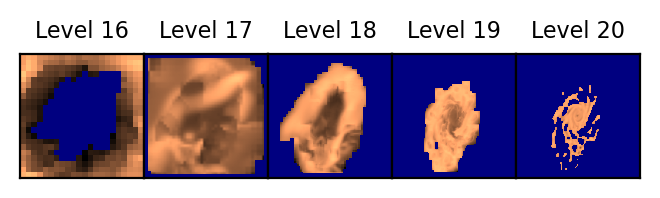

(352, 352) -> (480, 480) resize


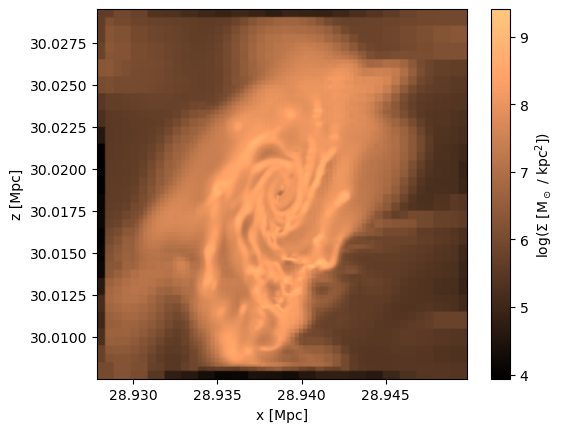

In [41]:
# Setting figure
fig, axes = plt.subplots(ncols=len(lvls), figsize=(4,len(lvls)*4), dpi=200)
plt.subplots_adjust(wspace=0)
for ax in axes.flatten():
    ax.set_facecolor('navy')
    ax.set_xticks([]); ax.set_yticks([])

# Draw the image
sx = lx // 2**refactor; sy = ly // 2**refactor
print(f"Firstly, draw image ({sx} X {sy})")
mass_total = np.zeros((sx,sy))
for ax, lvl in zip(axes,lvls):
    # Histogram shape of each level
    mask = cell['level']==lvl
    factor = 2**max(maxlvl-lvl-refactor, 0)
    shape = (int(sx/factor), int(sy/factor))
    print(f"Level {lvl} : {len(cell[mask])} cells -> {shape} image")
    xbins = np.linspace(x1, x2, shape[0]+1)
    ybins = np.linspace(y1, y2, shape[1]+1)
    mass, xe, ye = np.histogram2d(xx[mask], yy[mask], bins=[xbins, ybins], weights=cell['mp'][mask])

    # Draw sub-image
    ax.imshow(np.log10(mass.T), extent=[x1, x2, y1, y2], origin='lower', cmap='copper')
    ax.set_title(f"Level {lvl}", fontsize=8)
    # ----------------------------------------
    # 1. Expand the image with loop (slower)
    # ----------------------------------------
    # print(f" > {factor} X {factor} expansion")
    # for i in range(factor):
    #     for j in range(factor):
    #         mass_total[i::factor, j::factor] += mass / factor**2

    # ----------------------------------------
    # 2. Expand the image without loop (faster)
    # ----------------------------------------
    print(f"{factor} X {factor} expansion")
    mass_expanded = np.kron(mass, np.ones((factor, factor))) / factor**2
    mass_total += mass_expanded
plt.show(); plt.close()

# Total Image
fig, ax = plt.subplots(dpi=100)

# Mass map -> Column density map
pix2kpc = mindx * cparams['unit_l'] / 3.086e21
column_density_total = mass_total / pix2kpc**2
print(f"{column_density_total.shape} -> {desired_shape} resize")

# Resize the image
img = resize(column_density_total, desired_shape, anti_aliasing=True)

# Convert scale
x1Mpc = x1 * mindx * cparams['unit_l'] / 3.086e24 # [int] -> [code length] -> [cm] -> [Mpc]
x2Mpc = x2 * mindx * cparams['unit_l'] / 3.086e24
y1Mpc = y1 * mindx * cparams['unit_l'] / 3.086e24
y2Mpc = y2 * mindx * cparams['unit_l'] / 3.086e24

im = ax.imshow(np.log10(img.T), extent=[x1Mpc, x2Mpc, y1Mpc, y2Mpc], origin='lower', cmap='copper')
colorbar = fig.colorbar(im, label=r'log($\Sigma$ [M$_\odot$ / kpc$^2$])')
ax.set_xlabel(f'{desired_proj[0]} [Mpc]')
ax.set_ylabel(f'{desired_proj[1]} [Mpc]')
plt.show(); plt.close()
    


---

---